In [10]:
import glob
import os

import matplotlib.pyplot as plt
import numpy as np
import polars as pl
import seaborn as sns
from tqdm import tqdm

sns.set_palette('colorblind')

DATADIR = os.path.expanduser("~/data/usgs_water")

In [14]:
if not os.path.exists(full_fname := os.path.join(DATADIR, "all_US.csv")):
    df = pl.concat(
        [pl.read_excel(fname, engine="openpyxl") 
        for fname in tqdm(glob.glob(os.path.join(DATADIR, "*.xlsx")), position=0) if "DataDictionary" not in fname
        ])
    df.to_csv(full_fname, index=False)
else:
    df = pl.read_csv(full_fname)

100%|██████████| 52/52 [21:57<00:00, 25.33s/it]


SchemaError: cannot extend/append Null with String

In [5]:
df.shape

(12923, 269)

In [4]:
[col for col in df.columns if "washougal" in ", ".join(df[col].astype("str").str.lower().values)]

['from_map_nm', 'to_site_owner_alias_nm', 'to_huc_nm']

In [5]:
cldf = df[(df["from_county_nm"].str.lower() == "clark county") | (df["to_county_nm"].str.lower() == "clark county")]

In [6]:
cldf.iloc[3]

from_agency_cd                                                USGS
from_site_no                                            (b) (7)(F)
from_party_alias_nm                                            NaN
from_permit_cd                                                 NaN
from_permit_tx                                                 NaN
from_site_contact_nu                                           NaN
from_site_contact_alias_nm                                     NaN
from_site_contact_start_dt                                     NaN
from_site_contact_end_dt                                       NaN
from_site_contact_cn                                           NaN
from_site_contact_cr                                           NaN
from_site_contact_mn                                           NaN
from_site_owner_nu                                             NaN
from_site_owner_alias_nm                                       NaN
from_site_owner_cd                                            

In [7]:
df["yr_unit_abbrv_tx"].value_counts()

Mgal/d    10931
gal/yr     1992
Name: yr_unit_abbrv_tx, dtype: int64

In [8]:
df["cn_qnty_yr_va"] = [365*x/1e6 if y == "Mgal/d" else x for x, y in zip(df["cn_qnty_yr_va"], df["yr_unit_abbrv_tx"])]
df["yr_unit_abbrv_tx"] = "gal/yr"
df.sort_values("cn_qnty_yr_va").iloc[0]

from_agency_cd                                                USGS
from_site_no                                   (b) (7)(F), (b) (9)
from_party_alias_nm                                          USEPA
from_permit_cd                                                EPWS
from_permit_tx                                             1022022
from_site_contact_nu                                           NaN
from_site_contact_alias_nm                                     NaN
from_site_contact_start_dt                                     NaN
from_site_contact_end_dt                                       NaN
from_site_contact_cn                                           NaN
from_site_contact_cr                                           NaN
from_site_contact_mn                                           NaN
from_site_owner_nu                                             2.0
from_site_owner_alias_nm          CONSOLIDATED IRRIGATION DIST. 19
from_site_owner_cd                                            

(array([5.000e+00, 8.000e+00, 1.000e+00, 1.900e+01, 3.500e+02, 1.001e+03,
        3.560e+02, 1.680e+02, 6.500e+01, 6.000e+00]),
 array([ 1.81291336,  2.69386064,  3.57480792,  4.4557552 ,  5.33670247,
         6.21764975,  7.09859703,  7.97954431,  8.86049159,  9.74143887,
        10.62238615]),
 <BarContainer object of 10 artists>)

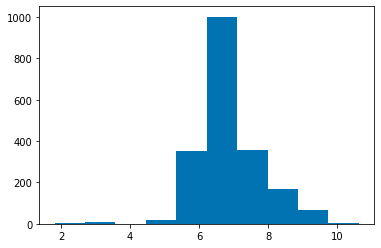

In [9]:
plt.hist(np.log10(df[df["cn_qnty_yr_va"]>1]["cn_qnty_yr_va"]))

In [10]:
df[df["cn_qnty_yr_va"]<1]["cn_qnty_yr_va"]

0        0.000237
1        0.000237
2        0.000237
3        0.000237
4        0.000237
           ...   
11323    0.000000
12156    0.000000
12157    0.000000
12158    0.000000
12159    0.000000
Name: cn_qnty_yr_va, Length: 10944, dtype: float64